#### ****PySpark Configurations****

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

#### ***PySpark Architecture and Features***

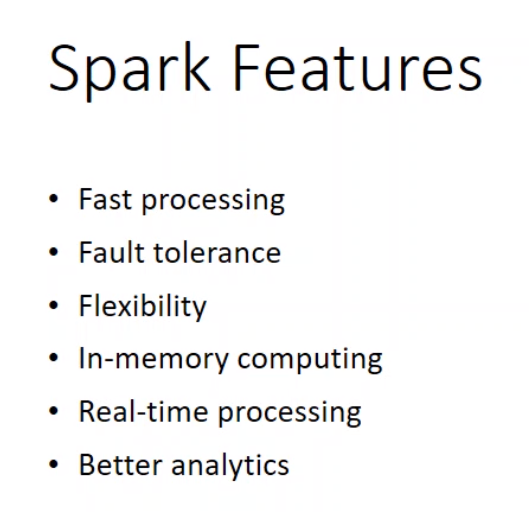

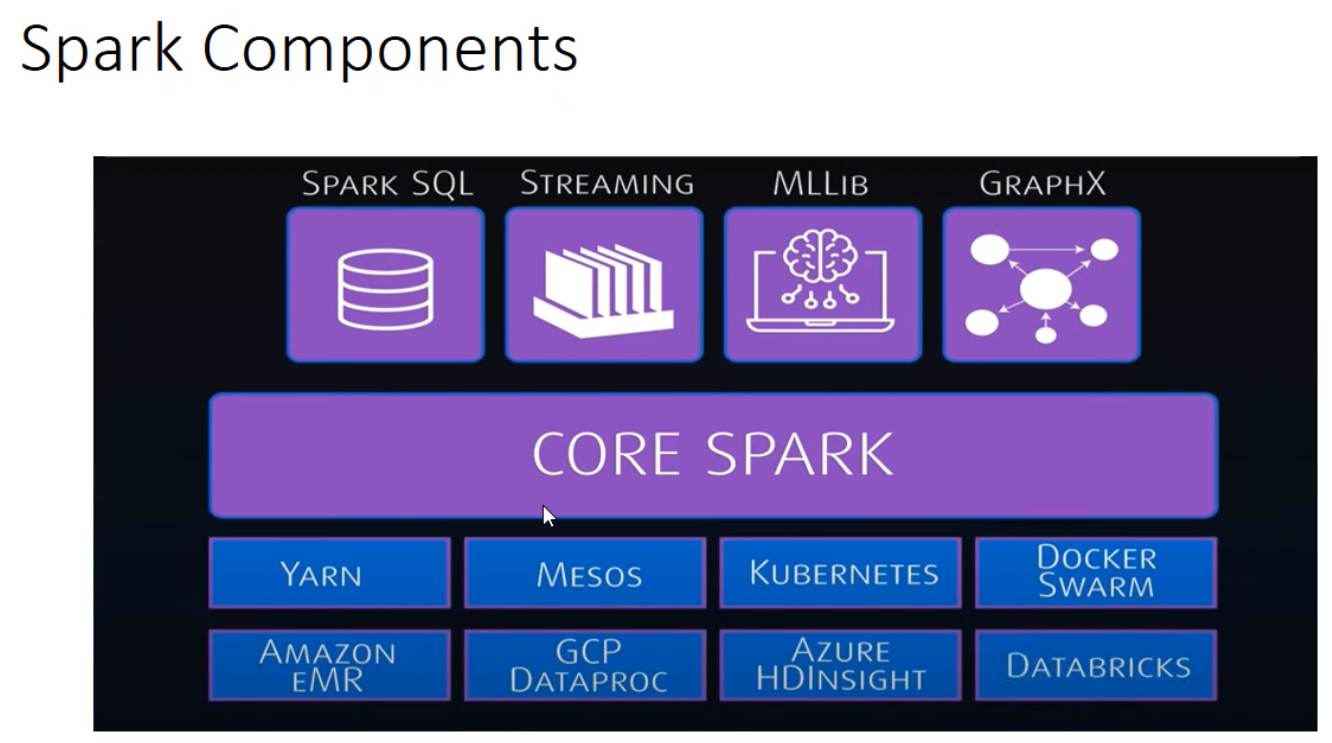

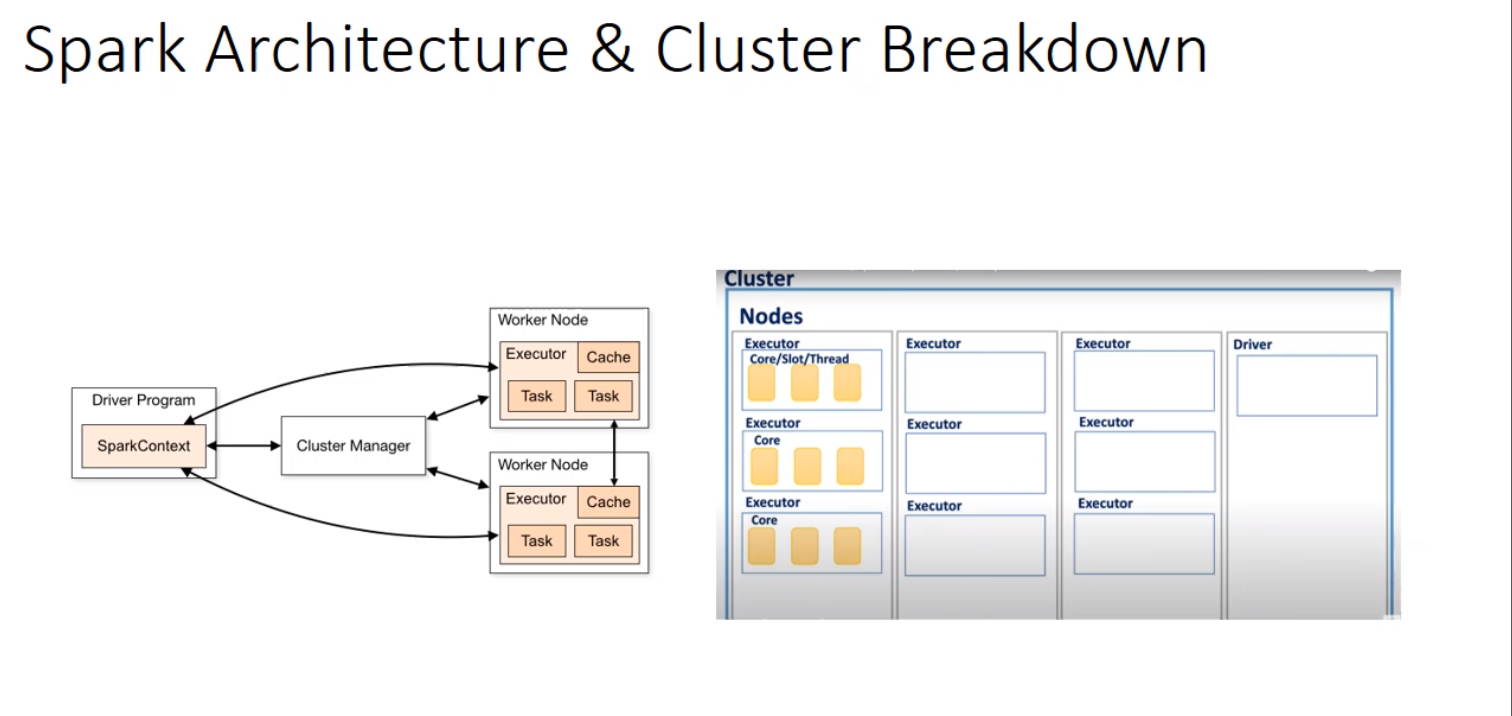

#### ***PySpark Reading Data***

In [5]:
data = [
    (1,"abc","aef","ahi","akl",123),
    (2,"qbc","qef","qhi","qkl",124),
    (3,"wbc","wef","whi","wkl",125),
]
columns_schema = ["id","firstname","lastname","country","state","salary"]
df = spark.createDataFrame(data = data, schema = columns_schema)


In [6]:
df

DataFrame[id: bigint, firstname: string, lastname: string, country: string, state: string, salary: bigint]

In [7]:
df.show()

+---+---------+--------+-------+-----+------+
| id|firstname|lastname|country|state|salary|
+---+---------+--------+-------+-----+------+
|  1|      abc|     aef|    ahi|  akl|   123|
|  2|      qbc|     qef|    qhi|  qkl|   124|
|  3|      wbc|     wef|    whi|  wkl|   125|
+---+---------+--------+-------+-----+------+



In [8]:
mydata = spark.read.format("csv").option("header","True").load("/content/sample_data/california_housing_test.csv")
mydata.show(1)

+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population|households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|-122.050000|37.370000|         27.000000|3885.000000|    661.000000|1537.000000|606.000000|     6.608500|     344700.000000|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
only showing top 1 row



In [9]:
mydata = spark.read.format("csv").option("header","False").load("/content/sample_data/california_housing_test.csv")
mydata.show(1)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|      _c0|     _c1|               _c2|        _c3|           _c4|       _c5|       _c6|          _c7|               _c8|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+
only showing top 1 row



##### ***Defining and cleaning Dataframe***

In [14]:
mydata = spark.read.format("csv").option("header","true").load("original.csv")

In [15]:
mydata

DataFrame[id: string, first_name: string, last_name: string, gender: string, City: string, JobTitle: string, Salary: string, Latitude: string, Longitude: string]

In [16]:
mydata.show(10)

+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude|  Longitude|
+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.5774075| 16.4967184|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|48.8231572|103.5218199|
|  3|    Alvera|  Di Boldi|Female|           null|                null|$57576.52|39.9947462|116.3397725|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23|44.5047212| 38.1300171|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      null| 37.6489954|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16|53.4266145| -6.1644997|
|  7|     Masha|    Divers|Female|         Dachun|     

###### ***When().otherwise()***

In [17]:
from pyspark.sql.functions import *
mydata2 = mydata.withColumn("clean_city", when(mydata.City.isNull(),'Unknown').otherwise(mydata.City))
mydata2.show(10)

+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude|  Longitude|     clean_city|
+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.5774075| 16.4967184|      Nowa Ruda|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|48.8231572|103.5218199|         Bulgan|
|  3|    Alvera|  Di Boldi|Female|           null|                null|$57576.52|39.9947462|116.3397725|        Unknown|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23|44.5047212| 38.1300171|  Divnomorskoye|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      null| 37.6489954|      Mytishchi|
|  6|     Maris|      Folk|Femal

##### ***Filter()***

In [18]:
mydata2 = mydata2.filter(mydata2.JobTitle.isNotNull())
mydata2.show(10)

+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude|  Longitude|     clean_city|
+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.5774075| 16.4967184|      Nowa Ruda|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|48.8231572|103.5218199|         Bulgan|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23|44.5047212| 38.1300171|  Divnomorskoye|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      null| 37.6489954|      Mytishchi|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16|53.4266145| -6.1644997|Kinsealy-Drinan|
|  8|   Goddart|     Flear|  Mal

##### ***Creating a new column - withColumn()***

In [19]:
mydata2 =  mydata2.withColumn("CleanSalary",mydata2.Salary.substr(2,100).cast('float'))
mydata2.show(10)

+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+-----------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude|  Longitude|     clean_city|CleanSalary|
+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+-----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.5774075| 16.4967184|      Nowa Ruda|   57438.18|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|48.8231572|103.5218199|         Bulgan|    62846.6|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23|44.5047212| 38.1300171|  Divnomorskoye|   61489.23|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      null| 37.6489954|      Mytishchi|   63863.09|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Enginee

##### ***Mean - avg()***

In [20]:
mean = mydata2.groupBy().avg("cleanSalary")
mean.show()

+-----------------+
| avg(cleanSalary)|
+-----------------+
|55516.32088199837|
+-----------------+



In [21]:
mean = mydata2.groupBy().avg("cleanSalary").take(1)[0][0]
mean

55516.32088199837

##### ***Adding a new column showing the literal value of the clean salary***

In [22]:
from pyspark.sql.functions import lit
lit(mean)

Column<'55516.32088199837'>

In [23]:
mydata2 = mydata2.withColumn("NewSalary", when(mydata2.CleanSalary.isNull(),lit(mean)).otherwise(mydata2.CleanSalary))
mydata2.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+-----------+----------------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude|  Longitude|     clean_city|CleanSalary|       NewSalary|
+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+-----------+----------------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.5774075| 16.4967184|      Nowa Ruda|   57438.18|   57438.1796875|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|48.8231572|103.5218199|         Bulgan|    62846.6|   62846.6015625|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23|44.5047212| 38.1300171|  Divnomorskoye|   61489.23|  61489.23046875|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      null| 37.6489

#### ***Using Numpy***

In [24]:
import numpy as np
latitudes = mydata2.select("Latitude")

In [25]:
latitudes.show(10)

+----------+
|  Latitude|
+----------+
|50.5774075|
|48.8231572|
|44.5047212|
|      null|
|53.4266145|
|45.1905186|
| 32.027934|
|  4.272793|
|     -5.85|
| 39.172378|
+----------+
only showing top 10 rows



In [26]:
latitudes = latitudes.filter(latitudes.Latitude.isNotNull())
latitudes.show(10)

+----------+
|  Latitude|
+----------+
|50.5774075|
|48.8231572|
|44.5047212|
|53.4266145|
|45.1905186|
| 32.027934|
|  4.272793|
|     -5.85|
| 39.172378|
|49.8151822|
+----------+
only showing top 10 rows



In [27]:
latitudes = latitudes.withColumn('latitude2',latitudes.Latitude.cast("float")).select('latitude2')
median = np.median(latitudes.collect())
median

31.93397331237793

In [28]:
mydata2 = mydata2.withColumn("Lat",when(mydata2.Latitude.isNull(),lit(median)).otherwise(mydata2.Latitude))
mydata2.show(10)

+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+-----------+----------------+-----------------+
| id|first_name| last_name|gender|           City|            JobTitle|   Salary|  Latitude|  Longitude|     clean_city|CleanSalary|       NewSalary|              Lat|
+---+----------+----------+------+---------------+--------------------+---------+----------+-----------+---------------+-----------+----------------+-----------------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.5774075| 16.4967184|      Nowa Ruda|   57438.18|   57438.1796875|       50.5774075|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|48.8231572|103.5218199|         Bulgan|    62846.6|   62846.6015625|       48.8231572|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23|44.5047212| 38.1300171|  Divnomorskoye|   61489.23|  61489.23046875|       44.5

#### ***Using SQL Functions***

##### ***GroupBy***

In [29]:
import pyspark.sql.functions as sqlfunc
genders = mydata2.groupBy("gender").agg(sqlfunc.avg("NewSalary").alias("AvgSalary"))

In [30]:
genders.show()

+------+------------------+
|gender|         AvgSalary|
+------+------------------+
|Female|55677.250125558036|
|  Male| 55361.09385573019|
+------+------------------+



##### ***Sort***

In [31]:
cityAvg = mydata2.groupBy("City").agg(sqlfunc.avg("NewSalary").alias('avgSalary'))
cityAvg = cityAvg.sort(col("avgSalary").desc())

In [32]:
cityAvg.show(10)

+--------------+-------------+
|          City|    avgSalary|
+--------------+-------------+
|     Mesopotam|  99948.28125|
|    Zhongcheng| 99942.921875|
|        Caxias|99786.3984375|
|   Karangtawar|99638.9921875|
|     Itabaiana|  99502.15625|
|        Pasian|  99421.34375|
|        Webuye| 99368.546875|
|   Yuktae-dong| 99250.828125|
|        Zinder|  99222.84375|
|Timiryazevskiy|   99142.9375|
+--------------+-------------+
only showing top 10 rows



#### ***DataTypes***

In [33]:
mydata.dtypes

[('id', 'string'),
 ('first_name', 'string'),
 ('last_name', 'string'),
 ('gender', 'string'),
 ('City', 'string'),
 ('JobTitle', 'string'),
 ('Salary', 'string'),
 ('Latitude', 'string'),
 ('Longitude', 'string')]

In [34]:
from pyspark.sql.types import *
schema = StructType(
    [
      StructField('id',IntegerType()),
      StructField('first_name',StringType()),
      StructField('last_name',StringType()),
      StructField('gender',StringType()),
      StructField('city',StringType()),
      StructField('job_title',StringType()),
      StructField('salary',StringType()),
      StructField('latitude',FloatType()),
      StructField('longitude',FloatType())
    ]
)

df = spark.read.csv("original.csv", header = True , schema = schema)
df.show(10)

+---+----------+----------+------+---------------+--------------------+---------+---------+----------+
| id|first_name| last_name|gender|           city|           job_title|   salary| latitude| longitude|
+---+----------+----------+------+---------------+--------------------+---------+---------+----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.577408| 16.496717|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60| 48.82316| 103.52182|
|  3|    Alvera|  Di Boldi|Female|           null|                null|$57576.52|39.994747|116.339775|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23|44.504723| 38.130016|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|     null| 37.648994|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16|53.426613|-6.1644998|
|  7|     Masha|    Divers|Female|         Dachun|                null|$2

In [35]:
df.dtypes

[('id', 'int'),
 ('first_name', 'string'),
 ('last_name', 'string'),
 ('gender', 'string'),
 ('city', 'string'),
 ('job_title', 'string'),
 ('salary', 'string'),
 ('latitude', 'float'),
 ('longitude', 'float')]

##### ***Dropping NA Values***

In [36]:
df_dropped = df.na.drop()
df_dropped.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
| id|first_name| last_name|gender|           city|           job_title|   salary|  latitude| longitude|
+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18| 50.577408| 16.496717|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|  48.82316| 103.52182|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23| 44.504723| 38.130016|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16| 53.426613|-6.1644998|
|  8|   Goddart|     Flear|  Male|      Trélissac|Desktop Support T...|$46116.36| 45.190517| 0.7423124|
|  9|      Roth|O'Cannavan|  Male|         Heitan|VP Product Manage...|$73697.10| 32.027935| 106.65711|
| 10|      Bran|   Trahear|  Male|       Arbeláez|Mechanical Sys

In [37]:
df_null_jobs = df.filter(df.job_title.isNotNull())
df_null_jobs.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
| id|first_name| last_name|gender|           city|           job_title|   salary|  latitude| longitude|
+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18| 50.577408| 16.496717|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|  48.82316| 103.52182|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23| 44.504723| 38.130016|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      null| 37.648994|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16| 53.426613|-6.1644998|
|  8|   Goddart|     Flear|  Male|      Trélissac|Desktop Support T...|$46116.36| 45.190517| 0.7423124|
|  9|      Roth|O'Cannavan|  Male|         Heitan|VP Product Man

##### ***Dropping Duplicates***

In [38]:
df_no_duplicates = df.dropDuplicates()
df_no_duplicates.show(10)

+---+----------+-----------+------+--------------------+--------------------+---------+---------+----------+
| id|first_name|  last_name|gender|                city|           job_title|   salary| latitude| longitude|
+---+----------+-----------+------+--------------------+--------------------+---------+---------+----------+
|176|    Gustaf| Warrington|  Male|              Imbang|    Product Engineer|$46385.22|11.099042| 122.65339|
|234|      Peri|      Dykas|Female|               Dzüyl|   Director of Sales|$28106.51|46.759335| 103.51848|
|238|     Verne|    Quinion|  Male|Schiedam postbusn...|Structural Analys...|$25602.20|   51.883|    4.3577|
|361|     Cyndy|   Lamperti|Female|            Hongzhou|    Product Engineer|$35707.31|30.274084| 120.15507|
|559|     Davin|    Steinor|  Male|            Sukaraja|  Analyst Programmer|$52745.59|-6.611144|106.847336|
|564|     Andra|Ambrozewicz|Female|            Zhangcun|   Chemical Engineer|$45824.56| 43.81707| 125.32355|
|739|        Jo|   

##### ***Filter with Regex***

In [39]:
df_filter = df.filter(df.first_name == "Alvera")
df_filter.show()

+---+----------+---------+------+----+---------+---------+---------+----------+
| id|first_name|last_name|gender|city|job_title|   salary| latitude| longitude|
+---+----------+---------+------+----+---------+---------+---------+----------+
|  3|    Alvera| Di Boldi|Female|null|     null|$57576.52|39.994747|116.339775|
+---+----------+---------+------+----+---------+---------+---------+----------+



In [40]:
df_filter = df.filter(df.first_name.like("%vera"))
df_filter.show()

+---+----------+---------+------+----+---------+---------+---------+----------+
| id|first_name|last_name|gender|city|job_title|   salary| latitude| longitude|
+---+----------+---------+------+----+---------+---------+---------+----------+
|  3|    Alvera| Di Boldi|Female|null|     null|$57576.52|39.994747|116.339775|
+---+----------+---------+------+----+---------+---------+---------+----------+



In [41]:
df_filter = df.filter(df.first_name.like("__vera"))
df_filter.show()

+---+----------+---------+------+----+---------+---------+---------+----------+
| id|first_name|last_name|gender|city|job_title|   salary| latitude| longitude|
+---+----------+---------+------+----+---------+---------+---------+----------+
|  3|    Alvera| Di Boldi|Female|null|     null|$57576.52|39.994747|116.339775|
+---+----------+---------+------+----+---------+---------+---------+----------+



In [42]:
df_filter = df.filter(df.first_name.endswith("era"))
df_filter.show()

+---+----------+---------+------+-------+--------------------+---------+---------+----------+
| id|first_name|last_name|gender|   city|           job_title|   salary| latitude| longitude|
+---+----------+---------+------+-------+--------------------+---------+---------+----------+
|  3|    Alvera| Di Boldi|Female|   null|                null|$57576.52|39.994747|116.339775|
|394|      Vera|Rosenbarg|Female|Šluknov|Research Assistan...|$49332.48|51.003193| 14.442367|
+---+----------+---------+------+-------+--------------------+---------+---------+----------+



In [43]:
df_filter = df.filter(df.first_name.startswith("Abe"))
df_filter.show()

+---+----------+---------+------+----------+-----------------+---------+---------+----------+
| id|first_name|last_name|gender|      city|        job_title|   salary| latitude| longitude|
+---+----------+---------+------+----------+-----------------+---------+---------+----------+
|470|      Abey|   Mesant|  Male|    Shedok|  Sales Associate|$74236.08|44.216785| 40.842213|
|640|   Abelard|  Fawbert|  Male|Sumurgayam|Marketing Manager|$84911.09|-6.888394|112.330795|
+---+----------+---------+------+----------+-----------------+---------+---------+----------+



In [44]:
df_filter = df.filter(df.id.between(1,10))
df_filter.show()

+---+----------+----------+------+---------------+--------------------+---------+---------+----------+
| id|first_name| last_name|gender|           city|           job_title|   salary| latitude| longitude|
+---+----------+----------+------+---------------+--------------------+---------+---------+----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18|50.577408| 16.496717|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60| 48.82316| 103.52182|
|  3|    Alvera|  Di Boldi|Female|           null|                null|$57576.52|39.994747|116.339775|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23|44.504723| 38.130016|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|     null| 37.648994|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16|53.426613|-6.1644998|
|  7|     Masha|    Divers|Female|         Dachun|                null|$2

In [45]:
df_filter = df.filter(df.first_name.isin("Maris","Masha"))
df_filter.show()

+---+----------+---------+------+---------------+--------------+---------+---------+----------+
| id|first_name|last_name|gender|           city|     job_title|   salary| latitude| longitude|
+---+----------+---------+------+---------------+--------------+---------+---------+----------+
|  6|     Maris|     Folk|Female|Kinsealy-Drinan|Civil Engineer|$30101.16|53.426613|-6.1644998|
|  7|     Masha|   Divers|Female|         Dachun|          null|$25090.87|24.879416|118.930115|
+---+----------+---------+------+---------------+--------------+---------+---------+----------+



In [46]:
df_substr = df.select(df.first_name,df.first_name.substr(1,5).alias("Name"))
df_substr.show(10)

+----------+-----+
|first_name| Name|
+----------+-----+
|   Melinde|Melin|
|  Kimberly|Kimbe|
|    Alvera|Alver|
|   Shannon|Shann|
|  Sherwood|Sherw|
|     Maris|Maris|
|     Masha|Masha|
|   Goddart|Godda|
|      Roth| Roth|
|      Bran| Bran|
+----------+-----+
only showing top 10 rows



#### ***SQL on dataframes***

In [47]:
df.registerTempTable("original")

In [48]:
query1 = spark.sql("select * from original")
query1.show()

+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
| id|first_name| last_name|gender|           city|           job_title|   salary|  latitude| longitude|
+---+----------+----------+------+---------------+--------------------+---------+----------+----------+
|  1|   Melinde| Shilburne|Female|      Nowa Ruda| Assistant Professor|$57438.18| 50.577408| 16.496717|
|  2|  Kimberly|Von Welden|Female|         Bulgan|       Programmer II|$62846.60|  48.82316| 103.52182|
|  3|    Alvera|  Di Boldi|Female|           null|                null|$57576.52| 39.994747|116.339775|
|  4|   Shannon| O'Griffin|  Male|  Divnomorskoye|Budget/Accounting...|$61489.23| 44.504723| 38.130016|
|  5|  Sherwood|   Macieja|  Male|      Mytishchi|            VP Sales|$63863.09|      null| 37.648994|
|  6|     Maris|      Folk|Female|Kinsealy-Drinan|      Civil Engineer|$30101.16| 53.426613|-6.1644998|
|  7|     Masha|    Divers|Female|         Dachun|              

In [49]:
query2 = spark.sql("select concat(first_name, ' ', last_name) as full_name from original where gender = 'Female'")
query2.show(10)

+-------------------+
|          full_name|
+-------------------+
|  Melinde Shilburne|
|Kimberly Von Welden|
|    Alvera Di Boldi|
|         Maris Folk|
|       Masha Divers|
|     Kylynn Lockart|
|         Rey Meharg|
|      Claude Briant|
|  Tiffanie Pattison|
|    Lurleen Janczak|
+-------------------+
only showing top 10 rows



##### ***GroupBy and Aggregation***

In [50]:
df =  df.withColumn("CleanSalary",df.salary.substr(2,100).cast('float'))
df1 = df.groupBy('gender').agg(sqlfunc.sum('CleanSalary'))

In [51]:
df1.show()

+------+--------------------+
|gender|    sum(CleanSalary)|
+------+--------------------+
|Female|2.7364519950195312E7|
|  Male|2.8123435678710938E7|
+------+--------------------+



In [52]:
df1 = df.groupBy('gender').agg(sqlfunc.sum('CleanSalary').alias("Total"),
                               sqlfunc.avg('CleanSalary').alias("Avg"),
                               sqlfunc.min('CleanSalary').alias("Min"),
                               sqlfunc.max('CleanSalary').alias("Max"))
df1.show()

+------+--------------------+-----------------+--------+--------+
|gender|               Total|              Avg|     Min|     Max|
+------+--------------------+-----------------+--------+--------+
|Female|2.7364519950195312E7|55618.94298820185|10616.44|99948.28|
|  Male|2.8123435678710938E7|55361.09385573019|10101.92|99942.92|
+------+--------------------+-----------------+--------+--------+



In [53]:
df1 = df.groupBy('gender','city').agg(sqlfunc.sum('CleanSalary').alias("Total"),
                               sqlfunc.avg('CleanSalary').alias("Avg"),
                               sqlfunc.min('CleanSalary').alias("Min"),
                               sqlfunc.max('CleanSalary').alias("Max"))
df1.show()

+------+-----------------+----------------+----------------+--------+--------+
|gender|             city|           Total|             Avg|     Min|     Max|
+------+-----------------+----------------+----------------+--------+--------+
|Female|           Dachun| 25090.869140625| 25090.869140625|25090.87|25090.87|
|Female|      Trollhättan|106623.369140625|53311.6845703125|26830.47| 79792.9|
|  Male|          Wenshao| 18941.509765625| 18941.509765625|18941.51|18941.51|
|Female|            Lanas| 13765.900390625| 13765.900390625| 13765.9| 13765.9|
|  Male|            Mörön|    77940.078125|    77940.078125|77940.08|77940.08|
|Female|             Same|   73369.7265625|   73369.7265625|73369.73|73369.73|
|Female|          Sawahan|  24608.83984375|  24608.83984375|24608.84|24608.84|
|  Male|Monte da Boavista|     98586.71875|     98586.71875|98586.72|98586.72|
|Female|         Nusajaya|    71637.921875|    71637.921875|71637.92|71637.92|
|Female|            Kista|   96192.3984375|   96192.

In [55]:
chlgDf = spark.read.format("csv").option("header","true").load("challenge.csv")
chlgDf.show(10)

+---------------+--------------+----------------+----------+
|     ip_address|       Country|     Domain Name|Bytes_used|
+---------------+--------------+----------------+----------+
|  52.81.192.172|         China|odnoklassniki.ru|       463|
| 119.239.207.13|         China|        youtu.be|        51|
|  68.69.217.210|         China|       adobe.com|        10|
|   7.191.21.223|      Bulgaria|    linkedin.com|       853|
|   211.13.10.68|     Indonesia|         hud.gov|        29|
|   239.80.21.97|      Suriname|      smh.com.au|       218|
|106.214.106.233|       Jamaica|   amazonaws.com|        95|
| 127.242.24.138|         China|surveymonkey.com|       123|
|     99.2.6.139|Czech Republic|    geocities.jp|       322|
|   237.54.11.63|         China|      amazon.com|        83|
+---------------+--------------+----------------+----------+
only showing top 10 rows



In [56]:
chlgDf = chlgDf.withColumn("isMexico",when(chlgDf.Country == 'Mexico',"yes").otherwise("No"))
chlgDf.show(30)

+---------------+--------------------+-----------------+----------+--------+
|     ip_address|             Country|      Domain Name|Bytes_used|isMexico|
+---------------+--------------------+-----------------+----------+--------+
|  52.81.192.172|               China| odnoklassniki.ru|       463|      No|
| 119.239.207.13|               China|         youtu.be|        51|      No|
|  68.69.217.210|               China|        adobe.com|        10|      No|
|   7.191.21.223|            Bulgaria|     linkedin.com|       853|      No|
|   211.13.10.68|           Indonesia|          hud.gov|        29|      No|
|   239.80.21.97|            Suriname|       smh.com.au|       218|      No|
|106.214.106.233|             Jamaica|    amazonaws.com|        95|      No|
| 127.242.24.138|               China| surveymonkey.com|       123|      No|
|     99.2.6.139|      Czech Republic|     geocities.jp|       322|      No|
|   237.54.11.63|               China|       amazon.com|        83|      No|

In [57]:
# chlgDf.groupBy("isMexico").agg(sqlfunc.avg('Bytes_used').alias("AvgBytes"))
chlg_group = chlgDf.groupBy('isMexico').agg(sqlfunc.sum('Bytes_used'))
chlg_group.show(10)

+--------+---------------+
|isMexico|sum(Bytes_used)|
+--------+---------------+
|      No|       508076.0|
|     yes|         6293.0|
+--------+---------------+



In [58]:
chlg_group = chlgDf.groupBy('Country').agg(sqlfunc.countDistinct("ip_address").alias("IPs used"))
chlg_group.sort(col('IPs used').desc()).show(10)

+--------------+--------+
|       Country|IPs used|
+--------------+--------+
|         China|     172|
|     Indonesia|     114|
|   Philippines|      65|
|        Russia|      56|
|        Brazil|      35|
|        Poland|      31|
|        Sweden|      28|
|         Japan|      25|
|Czech Republic|      23|
|      Portugal|      23|
+--------------+--------+
only showing top 10 rows



#### ***Read CSV***

In [59]:
df = spark.read.format("csv").load("/content/sample_data/california_housing_test.csv")
df.show(5)

+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|        _c0|      _c1|               _c2|        _c3|           _c4|        _c5|       _c6|          _c7|               _c8|
+-----------+---------+------------------+-----------+--------------+-----------+----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population|households|median_income|median_house_value|
|-122.050000|37.370000|         27.000000|3885.000000|    661.000000|1537.000000|606.000000|     6.608500|     344700.000000|
|-118.300000|34.260000|         43.000000|1510.000000|    310.000000| 809.000000|277.000000|     3.599000|     176500.000000|
|-117.810000|33.780000|         27.000000|3589.000000|    507.000000|1484.000000|495.000000|     5.793400|     270500.000000|
|-118.360000|33.820000|         28.000000|  67.000000|     15.000000|  49.000000| 11.000000|     6.135900|     330000.

In [60]:
df = spark.read.option('header','True').csv("/content/sample_data/california_housing_test.csv")
df.show()

+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|  longitude| latitude|housing_median_age|total_rooms|total_bedrooms| population| households|median_income|median_house_value|
+-----------+---------+------------------+-----------+--------------+-----------+-----------+-------------+------------------+
|-122.050000|37.370000|         27.000000|3885.000000|    661.000000|1537.000000| 606.000000|     6.608500|     344700.000000|
|-118.300000|34.260000|         43.000000|1510.000000|    310.000000| 809.000000| 277.000000|     3.599000|     176500.000000|
|-117.810000|33.780000|         27.000000|3589.000000|    507.000000|1484.000000| 495.000000|     5.793400|     270500.000000|
|-118.360000|33.820000|         28.000000|  67.000000|     15.000000|  49.000000|  11.000000|     6.135900|     330000.000000|
|-119.670000|36.330000|         19.000000|1241.000000|    244.000000| 850.000000| 237.000000|     2.937500|    

#### ***Types and Functions***

In [61]:
from pyspark.sql.types import *
schema = StructType(
    [
      StructField('Name',StringType()),
      StructField('Roll',IntegerType()),
      StructField('Batch',StringType()),
    ]
)

In [62]:
data = [
    ("Vinayak",1,"CSE"),
    ("Neel",2,"CSIT"),
    ("PK",3,"CSE"),
    ("PK",3,"CSE")
]

df = spark.createDataFrame(data = data, schema = schema)
df.show(),df.printSchema()

+-------+----+-----+
|   Name|Roll|Batch|
+-------+----+-----+
|Vinayak|   1|  CSE|
|   Neel|   2| CSIT|
|     PK|   3|  CSE|
|     PK|   3|  CSE|
+-------+----+-----+

root
 |-- Name: string (nullable = true)
 |-- Roll: integer (nullable = true)
 |-- Batch: string (nullable = true)



(None, None)

In [63]:
df.count(),df.dropDuplicates().count()

(4, 3)

In [64]:
df.distinct().show()

+-------+----+-----+
|   Name|Roll|Batch|
+-------+----+-----+
|     PK|   3|  CSE|
|Vinayak|   1|  CSE|
|   Neel|   2| CSIT|
+-------+----+-----+



In [66]:
df.select("Name", "batch").show()

+-------+-----+
|   Name|batch|
+-------+-----+
|Vinayak|  CSE|
|   Neel| CSIT|
|     PK|  CSE|
|     PK|  CSE|
+-------+-----+



#### ***Read JSON***

In [67]:
import json
data = {
    "array": [
      1,
      2,
      3
    ],
    "boolean": True,
    "color": "gold",
    "number": 123,
    "object": {
      "a": "b",
      "c": "d"
    },
    "string": "Hello World"
  }


# data {
#     "fruit": "Apple",
#     "size": "Large",
#     "color": "Red"
# }

json_object = json.dumps(data, indent=4)
with open("sample.json", "w") as outfile:
    outfile.write(json_object)

In [68]:
df = spark.read.option('multiline',"true").json("sample.json")

In [69]:
df.show()

+---------+-------+-----+------+------+-----------+
|    array|boolean|color|number|object|     string|
+---------+-------+-----+------+------+-----------+
|[1, 2, 3]|   true| gold|   123|{b, d}|Hello World|
+---------+-------+-----+------+------+-----------+



#### ***Reading Parquet File***

In [101]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("parquetFile").getOrCreate()
data =[("James ","","Smith","36636","M",3000),
              ("Michael ","Rose","","40288","M",4000),
              ("Robert ","","Williams","42114","M",4000),
              ("Maria ","Anne","Jones","39192","F",4000),
              ("Jen","Mary","Brown","","F",-1)]
columns=["firstname","middlename","lastname","dob","gender","salary"]
df=spark.createDataFrame(data,columns)

In [102]:
df.write.parquet("/tmp/output/people.parquet")

In [103]:
parDF=spark.read.parquet("/tmp/output/people.parquet")

In [106]:
parqDF=spark.read.parquet("/tmp/output/people.parquet")
parqDF.createOrReplaceTempView("ParquetTable")
parkSQL = spark.sql("select * from ParquetTable where salary >= 4000 ")

In [109]:
parkSQL.show()

+---------+----------+--------+-----+------+------+
|firstname|middlename|lastname|  dob|gender|salary|
+---------+----------+--------+-----+------+------+
|  Robert |          |Williams|42114|     M|  4000|
|   Maria |      Anne|   Jones|39192|     F|  4000|
| Michael |      Rose|        |40288|     M|  4000|
+---------+----------+--------+-----+------+------+



In [107]:
# Create temp view on Parquet file
spark.sql("CREATE TEMPORARY VIEW PERSON USING parquet OPTIONS (path \"/tmp/output/people.parquet\")")
spark.sql("SELECT * FROM PERSON").show()

+---------+----------+--------+-----+------+------+
|firstname|middlename|lastname|  dob|gender|salary|
+---------+----------+--------+-----+------+------+
|  Robert |          |Williams|42114|     M|  4000|
|   Maria |      Anne|   Jones|39192|     F|  4000|
|      Jen|      Mary|   Brown|     |     F|    -1|
|   James |          |   Smith|36636|     M|  3000|
| Michael |      Rose|        |40288|     M|  4000|
+---------+----------+--------+-----+------+------+



#### ***Functions***

In [70]:
import csv
with open('dummy.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    field = ["Country name", "Country Code", "Year", "Value"]

    writer.writerow(field)
    writer.writerow(["India","In01",2000,90])
    writer.writerow(["USA", "US02", 2001,80])
    writer.writerow(["Chine","CH31",2002,70])
    writer.writerow(["Germany", "Ge06", 2003,83])
    writer.writerow(["Nepal","Ne05",2004,40])


In [71]:
df = spark.read.options(delimiter = ',', inferschema = True, header= True ).csv("/content/dummy.csv")
df.show()

+------------+------------+----+-----+
|Country name|Country Code|Year|Value|
+------------+------------+----+-----+
|       India|        In01|2000|   90|
|         USA|        US02|2001|   80|
|       Chine|        CH31|2002|   70|
|     Germany|        Ge06|2003|   83|
|       Nepal|        Ne05|2004|   40|
+------------+------------+----+-----+



In [72]:
df.printSchema()

root
 |-- Country name: string (nullable = true)
 |-- Country Code: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Value: integer (nullable = true)



In [73]:
df.columns

['Country name', 'Country Code', 'Year', 'Value']

In [74]:
df.count()

5

In [75]:
df.take(2)

[Row(Country name='India', Country Code='In01', Year=2000, Value=90),
 Row(Country name='USA', Country Code='US02', Year=2001, Value=80)]

In [76]:
import csv
with open('dummy2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    field = ["Country name", "Country Code", "Year", "Value"]

    writer.writerow(field)
    writer.writerow(["India","In01",2000,90])
    writer.writerow(["India","In01",2001,90])
    writer.writerow(["India","In01",2005,90])
    writer.writerow(["USA", "US02", 2001,80])
    writer.writerow(["Chine","CH31",2002,70])
    writer.writerow(["Germany", "Ge06", 2003,83])
    writer.writerow(["Nepal","Ne05",2000,40])


In [77]:
df = spark.read.options(delimiter = ',', inferschema = True, header= True ).csv("/content/dummy2.csv")
df.show()

+------------+------------+----+-----+
|Country name|Country Code|Year|Value|
+------------+------------+----+-----+
|       India|        In01|2000|   90|
|       India|        In01|2001|   90|
|       India|        In01|2005|   90|
|         USA|        US02|2001|   80|
|       Chine|        CH31|2002|   70|
|     Germany|        Ge06|2003|   83|
|       Nepal|        Ne05|2000|   40|
+------------+------------+----+-----+



In [78]:
df.dropDuplicates().show()

+------------+------------+----+-----+
|Country name|Country Code|Year|Value|
+------------+------------+----+-----+
|       Nepal|        Ne05|2000|   40|
|       India|        In01|2000|   90|
|         USA|        US02|2001|   80|
|       Chine|        CH31|2002|   70|
|     Germany|        Ge06|2003|   83|
|       India|        In01|2005|   90|
|       India|        In01|2001|   90|
+------------+------------+----+-----+



In [79]:
df.show()

+------------+------------+----+-----+
|Country name|Country Code|Year|Value|
+------------+------------+----+-----+
|       India|        In01|2000|   90|
|       India|        In01|2001|   90|
|       India|        In01|2005|   90|
|         USA|        US02|2001|   80|
|       Chine|        CH31|2002|   70|
|     Germany|        Ge06|2003|   83|
|       Nepal|        Ne05|2000|   40|
+------------+------------+----+-----+



In [80]:
df.filter(df["Country name"] == "India").show()

+------------+------------+----+-----+
|Country name|Country Code|Year|Value|
+------------+------------+----+-----+
|       India|        In01|2000|   90|
|       India|        In01|2001|   90|
|       India|        In01|2005|   90|
+------------+------------+----+-----+



In [81]:
from pyspark.sql.functions import col
df.filter(col("Country name") == "India").show()

+------------+------------+----+-----+
|Country name|Country Code|Year|Value|
+------------+------------+----+-----+
|       India|        In01|2000|   90|
|       India|        In01|2001|   90|
|       India|        In01|2005|   90|
+------------+------------+----+-----+



In [82]:
df.filter((df["Country name"] == "India") &  (df["Year"] == 2000) | (df["Year"] == 2005)).show()

+------------+------------+----+-----+
|Country name|Country Code|Year|Value|
+------------+------------+----+-----+
|       India|        In01|2000|   90|
|       India|        In01|2005|   90|
+------------+------------+----+-----+



In [83]:
df.show()


+------------+------------+----+-----+
|Country name|Country Code|Year|Value|
+------------+------------+----+-----+
|       India|        In01|2000|   90|
|       India|        In01|2001|   90|
|       India|        In01|2005|   90|
|         USA|        US02|2001|   80|
|       Chine|        CH31|2002|   70|
|     Germany|        Ge06|2003|   83|
|       Nepal|        Ne05|2000|   40|
+------------+------------+----+-----+



In [84]:
df.select(["Country Code" , "Year"]).show()

+------------+----+
|Country Code|Year|
+------------+----+
|        In01|2000|
|        In01|2001|
|        In01|2005|
|        US02|2001|
|        CH31|2002|
|        Ge06|2003|
|        Ne05|2000|
+------------+----+



In [85]:
df.select("*").orderBy("year").show()

+------------+------------+----+-----+
|Country name|Country Code|Year|Value|
+------------+------------+----+-----+
|       Nepal|        Ne05|2000|   40|
|       India|        In01|2000|   90|
|       India|        In01|2001|   90|
|         USA|        US02|2001|   80|
|       Chine|        CH31|2002|   70|
|     Germany|        Ge06|2003|   83|
|       India|        In01|2005|   90|
+------------+------------+----+-----+



In [86]:
df.withColumnRenamed("Country name","Country").withColumnRenamed("Country Code","Code").show()

+-------+----+----+-----+
|Country|Code|Year|Value|
+-------+----+----+-----+
|  India|In01|2000|   90|
|  India|In01|2001|   90|
|  India|In01|2005|   90|
|    USA|US02|2001|   80|
|  Chine|CH31|2002|   70|
|Germany|Ge06|2003|   83|
|  Nepal|Ne05|2000|   40|
+-------+----+----+-----+



#### ***RDD***

 * Fault tolerant
 * multiple executable nodes
 * automatic data rollback
 * in memory computation

In [88]:
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [89]:
tx = "Once, there was a dog who wandered the streets night and day in search of food. One day, he found a big juicy bone, and he immediately grabbed it in his mouth and took it home. On his way home, he crossed a river and saw another dog with a bone in its mouth. He wanted that bone for himself, too. But as he opened his mouth, the bone he was biting fell into the river and sank. That night, he went home hungry."
rdd1 = sc.parallelize(tx.split())

In [90]:
print(rdd1)

ParallelCollectionRDD[359] at readRDDFromFile at PythonRDD.scala:274


In [91]:
rdd2 = rdd1.map(lambda x: (x,1))
rdd2.collect()

[('Once,', 1),
 ('there', 1),
 ('was', 1),
 ('a', 1),
 ('dog', 1),
 ('who', 1),
 ('wandered', 1),
 ('the', 1),
 ('streets', 1),
 ('night', 1),
 ('and', 1),
 ('day', 1),
 ('in', 1),
 ('search', 1),
 ('of', 1),
 ('food.', 1),
 ('One', 1),
 ('day,', 1),
 ('he', 1),
 ('found', 1),
 ('a', 1),
 ('big', 1),
 ('juicy', 1),
 ('bone,', 1),
 ('and', 1),
 ('he', 1),
 ('immediately', 1),
 ('grabbed', 1),
 ('it', 1),
 ('in', 1),
 ('his', 1),
 ('mouth', 1),
 ('and', 1),
 ('took', 1),
 ('it', 1),
 ('home.', 1),
 ('On', 1),
 ('his', 1),
 ('way', 1),
 ('home,', 1),
 ('he', 1),
 ('crossed', 1),
 ('a', 1),
 ('river', 1),
 ('and', 1),
 ('saw', 1),
 ('another', 1),
 ('dog', 1),
 ('with', 1),
 ('a', 1),
 ('bone', 1),
 ('in', 1),
 ('its', 1),
 ('mouth.', 1),
 ('He', 1),
 ('wanted', 1),
 ('that', 1),
 ('bone', 1),
 ('for', 1),
 ('himself,', 1),
 ('too.', 1),
 ('But', 1),
 ('as', 1),
 ('he', 1),
 ('opened', 1),
 ('his', 1),
 ('mouth,', 1),
 ('the', 1),
 ('bone', 1),
 ('he', 1),
 ('was', 1),
 ('biting', 1),
 ('f

In [92]:
rdd1.filter(lambda x: len(x) >= 7).collect()

['wandered',
 'streets',
 'immediately',
 'grabbed',
 'crossed',
 'another',
 'himself,',
 'hungry.']

#### ***Working with REGEX and TimeStamp***

In [94]:
import csv
with open('dummy.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["id","Name","Address","Date"])
    writer.writerow([1,"Vinayak", "D/O New Delhi","2023-01-01 10:22"])
    writer.writerow([2,"Kanishk","C\O Tarun123 New Delhi","2023-01-01 12:22"])
    writer.writerow([3,"Neel", "C//O Tarun ₹ New Delhi","2023-01-02 18:23"])


In [95]:
df = spark.read.options(delimiter = ',', inferschema = True, header= True ).csv("/content/dummy.csv")
df.show(truncate=False)

+---+-------+----------------------+----------------+
|id |Name   |Address               |Date            |
+---+-------+----------------------+----------------+
|1  |Vinayak|D/O New Delhi         |2023-01-01 10:22|
|2  |Kanishk|C\O Tarun123 New Delhi|2023-01-01 12:22|
|3  |Neel   |C//O Tarun ₹ New Delhi|2023-01-02 18:23|
+---+-------+----------------------+----------------+



In [96]:
exp = '^(D/O|C\\\\O) [A-Za-z0-9 ]+$'
# 4 backslashes because it needs to be escaped by both python and reqex separately
from pyspark.sql.functions import col
df.filter(col("Address").rlike(exp)).show(truncate=False)

+---+-------+----------------------+----------------+
|id |Name   |Address               |Date            |
+---+-------+----------------------+----------------+
|1  |Vinayak|D/O New Delhi         |2023-01-01 10:22|
|2  |Kanishk|C\O Tarun123 New Delhi|2023-01-01 12:22|
+---+-------+----------------------+----------------+



In [97]:
from pyspark.sql.functions import col, unix_timestamp, from_unixtime
# unix_timestamp converts timestamp to unix timestamp and from_unixtime converts unix timestpam to timestamp
df_formatted = df.withColumn("Date", from_unixtime(unix_timestamp(col("Date"), "yyyy-MM-dd HH:mm"), "yyyy-MM-dd HH:mm:ss"))

In [98]:
df_formatted.show(truncate=False)

+---+-------+----------------------+-------------------+
|id |Name   |Address               |Date               |
+---+-------+----------------------+-------------------+
|1  |Vinayak|D/O New Delhi         |2023-01-01 10:22:00|
|2  |Kanishk|C\O Tarun123 New Delhi|2023-01-01 12:22:00|
|3  |Neel   |C//O Tarun ₹ New Delhi|2023-01-02 18:23:00|
+---+-------+----------------------+-------------------+



In [99]:
df_formatted.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Date: string (nullable = true)

